<h2><u><b>This Study Consists of 6 Sections:</b></u></h2>

- Section 1: Clean The Dataset
  
- Section 2: Exploratory Insights
  
- Section 3: Test Sub Sample Differences
  
- Section 4: Inference
  
- Section 5: Prediction Model
  
- Section 6: Higher Likelihood of Losing Customers

In [74]:
# Importing Necessary libraries and Packages
# For data manipulation and analysis
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt

# For standardizing data to detect outliers
from scipy.stats import zscore

# For numerical operations
import numpy as np

# For conducting independent t-tests
from scipy.stats import ttest_ind

# For statistical modeling and analysis
import statsmodels.api as sm

# For multicollinearity checks
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For standardizing features before modeling
from sklearn.preprocessing import StandardScaler

# For ridge regression (regularized linear regression)
from sklearn.linear_model import Ridge

 # For dimensionality reduction
from sklearn.decomposition import PCA

# For ensemble regression models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# For regularized regression models
from sklearn.linear_model import Ridge, Lasso

# For evaluating regression model performance
from sklearn.metrics import mean_squared_error, r2_score

 # For binary/multiclass classification
from sklearn.linear_model import LogisticRegression

# For classification evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# For ensemble classification model
from sklearn.ensemble import RandomForestClassifier

# For a summary report of classification metrics
from sklearn.metrics import classification_report

In [76]:
#Loading Dataset
data = pd.read_csv('combined.csv', encoding='ISO-8859-1', low_memory=False)

<h3>Section 1: <u>Clean The Dataset</u></h3>

In [78]:
data.head()

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_code,customer_district_code,item_code,...,value_quantity,value_price_adjustment,currency,item_source_class,invoice_number,line_number,invoice_date,customer_order_number,order_date,dss_update_time
0,20120509,2012,11,2012,5,9,101,411800601,410,GENIE8WWWBC,...,84,0,AUD,NaN,2217887,1,20120509,2865354,20120509,49:58.7
1,20120216,2012,8,2012,2,16,101,361000403,300,GENIE8WWWBC,...,12,0,AUD,NaN,2185745,1,20120216,2833515,20120216,49:58.7
2,20120509,2012,11,2012,5,9,101,361000403,300,GENIE8WWWBC,...,12,0,AUD,NaN,2217807,1,20120509,2864857,20120508,49:58.7
3,20120518,2012,11,2012,5,18,101,565540415,500,GENIE8WWWBC,...,6,0,AUD,NaN,2222758,1,20120518,2869759,20120518,49:58.7
4,20120109,2012,7,2012,1,9,101,565540415,500,GENIE8WWWBC,...,6,0,AUD,NaN,2170374,1,20120109,2819189,20120109,49:58.7


In [79]:
data.tail()

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_code,customer_district_code,item_code,...,value_quantity,value_price_adjustment,currency,item_source_class,invoice_number,line_number,invoice_date,customer_order_number,order_date,dss_update_time
1988378,20131106,2014,5,2013,11,6,101,299480704,200,TWG114/2005,...,8,0,AUD,NaN,2423898,1,20131106,3079784,20131106,49:58.7
1988379,20130717,2014,1,2013,7,17,101,500900630,500,SCRN236E2F4,...,5,0,AUD,NaN,2383667,1,20130717,3024473,20130627,49:58.7
1988380,20131021,2014,4,2013,10,21,205,552800304,500,DOT92STW,...,31,0,AUD,NaN,2419020,1,20131021,3070986,20131021,49:58.7
1988381,20131101,2014,5,2013,11,1,101,565540407,500,TWG114/2005,...,1,0,AUD,NaN,2422799,1,20131101,3073478,20131028,49:58.7
1988382,20130925,2014,3,2013,9,25,101,565540407,500,TWG114/2005,...,1,0,AUD,NaN,2411003,1,20130925,3060996,20130925,49:58.7


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988383 entries, 0 to 1988382
Data columns (total 41 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   accounting_date           object
 1   fiscal_year               object
 2   fiscal_month              object
 3   calendar_year             object
 4   calendar_month            object
 5   calendar_day              object
 6   company_code              object
 7   customer_code             object
 8   customer_district_code    object
 9   item_code                 object
 10  business_area_code        object
 11  item_group_code           object
 12  item_class_code           object
 13  item_type                 object
 14  bonus_group_code          object
 15  environment_group_code    object
 16  technology_group_code     object
 17  commission_group_code     object
 18  reporting_classification  object
 19  light_source              object
 20  warehouse_code            object
 21  abc_clas

In [81]:
#The number of rows and columns
print("Dataset dimensions:", data.shape)

Dataset dimensions: (1988383, 41)


In [82]:
data.describe().T

,count,unique,top,freq
accounting_date,1988383,544,20130430,8132
fiscal_year,1988383,4,2013,978202
fiscal_month,1988383,13,11,213313
calendar_year,1988383,3,2012,1037205
calendar_month,1988383,13,5,213313
calendar_day,1988383,32,5,74578
company_code,1988383,11,205,1414918
customer_code,1988383,4488,234750001,61844
customer_district_code,1988383,18,300,429358
item_code,1988383,34473,25550,9265


In [83]:
print("\nFirst Few Rows of Dataset:")
print(data.head())


First Few Rows of Dataset:
  accounting_date fiscal_year fiscal_month calendar_year calendar_month  \
0        20120509        2012           11          2012              5   
1        20120216        2012            8          2012              2   
2        20120509        2012           11          2012              5   
3        20120518        2012           11          2012              5   
4        20120109        2012            7          2012              1   

  calendar_day company_code customer_code customer_district_code  \
0            9          101     411800601                    410   
1           16          101     361000403                    300   
2            9          101     361000403                    300   
3           18          101     565540415                    500   
4            9          101     565540415                    500   

                        item_code  ... value_quantity value_price_adjustment  \
0  GENIE8WWWBC                  

In [84]:
data.nunique()

accounting_date                544
fiscal_year                      4
fiscal_month                    13
calendar_year                    3
calendar_month                  13
calendar_day                    32
company_code                    11
customer_code                 4488
customer_district_code          18
item_code                    34473
business_area_code              29
item_group_code                615
item_class_code                205
item_type                       10
bonus_group_code                 3
environment_group_code          10
technology_group_code          104
commission_group_code            4
reporting_classification         3
light_source                     4
warehouse_code                  60
abc_class_code                  11
abc_class_volume                11
business_chain_l1_code          49
business_chain_l1_name          44
contact_method_code           1666
salesperson_code               272
order_type_code                 38
market_segment      

In [85]:
#Missing Values Per Column
missing_values = data.isnull().sum()
print("Missing values in the dataset:\n", missing_values)

Missing values in the dataset:
 accounting_date                   0
fiscal_year                       0
fiscal_month                      0
calendar_year                     0
calendar_month                    0
calendar_day                      0
company_code                      0
customer_code                     0
customer_district_code            0
item_code                         0
business_area_code                0
item_group_code                   0
item_class_code                   0
item_type                         0
bonus_group_code                  0
environment_group_code            0
technology_group_code             0
commission_group_code             0
reporting_classification          0
light_source                      0
warehouse_code                    0
abc_class_code                    0
abc_class_volume                  0
business_chain_l1_code            0
business_chain_l1_name            0
contact_method_code               0
salesperson_code                

In [86]:
print(data.dtypes) #checking the datatype of the dataframe

accounting_date             object
fiscal_year                 object
fiscal_month                object
calendar_year               object
calendar_month              object
calendar_day                object
company_code                object
customer_code               object
customer_district_code      object
item_code                   object
business_area_code          object
item_group_code             object
item_class_code             object
item_type                   object
bonus_group_code            object
environment_group_code      object
technology_group_code       object
commission_group_code       object
reporting_classification    object
light_source                object
warehouse_code              object
abc_class_code              object
abc_class_volume            object
business_chain_l1_code      object
business_chain_l1_name      object
contact_method_code         object
salesperson_code            object
order_type_code             object
market_segment      

In [87]:
data['item_source_class'] = data['item_source_class'].fillna(data['item_source_class'].mode()[0])

In [88]:
#Missing Values Per Column
missing_values = data.isnull().sum()
print("Missing values in the dataset:\n", missing_values)

Missing values in the dataset:
 accounting_date             0
fiscal_year                 0
fiscal_month                0
calendar_year               0
calendar_month              0
calendar_day                0
company_code                0
customer_code               0
customer_district_code      0
item_code                   0
business_area_code          0
item_group_code             0
item_class_code             0
item_type                   0
bonus_group_code            0
environment_group_code      0
technology_group_code       0
commission_group_code       0
reporting_classification    0
light_source                0
warehouse_code              0
abc_class_code              0
abc_class_volume            0
business_chain_l1_code      0
business_chain_l1_name      0
contact_method_code         0
salesperson_code            0
order_type_code             0
market_segment              0
value_sales                 0
value_cost                  0
value_quantity              0
value_pr

In [89]:
# Convert specific columns to numeric format
data['value_sales'] = pd.to_numeric(data['value_sales'], errors='coerce')
data['value_cost'] = pd.to_numeric(data['value_cost'], errors='coerce')
data['value_quantity'] = pd.to_numeric(data['value_quantity'], errors='coerce')
data['value_price_adjustment'] = pd.to_numeric(data['value_price_adjustment'], errors='coerce')

# Check data types again after conversion
print("Data types after numeric conversion:\n", data.dtypes)

Data types after numeric conversion:
 accounting_date              object
fiscal_year                  object
fiscal_month                 object
calendar_year                object
calendar_month               object
calendar_day                 object
company_code                 object
customer_code                object
customer_district_code       object
item_code                    object
business_area_code           object
item_group_code              object
item_class_code              object
item_type                    object
bonus_group_code             object
environment_group_code       object
technology_group_code        object
commission_group_code        object
reporting_classification     object
light_source                 object
warehouse_code               object
abc_class_code               object
abc_class_volume             object
business_chain_l1_code       object
business_chain_l1_name       object
contact_method_code          object
salesperson_code          

In [90]:
# Fill missing values in numeric columns with median without inplace
data['value_sales'] = data['value_sales'].fillna(data['value_sales'].median())
data['value_cost'] = data['value_cost'].fillna(data['value_cost'].median())
data['value_quantity'] = data['value_quantity'].fillna(data['value_quantity'].median())
data['value_price_adjustment'] = data['value_price_adjustment'].fillna(data['value_price_adjustment'].median())

# Check if missing values have been filled
missing_values_after = data.isnull().sum()
print("After filling missing values in numeric columns:\n", missing_values_after)

After filling missing values in numeric columns:
 accounting_date             0
fiscal_year                 0
fiscal_month                0
calendar_year               0
calendar_month              0
calendar_day                0
company_code                0
customer_code               0
customer_district_code      0
item_code                   0
business_area_code          0
item_group_code             0
item_class_code             0
item_type                   0
bonus_group_code            0
environment_group_code      0
technology_group_code       0
commission_group_code       0
reporting_classification    0
light_source                0
warehouse_code              0
abc_class_code              0
abc_class_volume            0
business_chain_l1_code      0
business_chain_l1_name      0
contact_method_code         0
salesperson_code            0
order_type_code             0
market_segment              0
value_sales                 0
value_cost                  0
value_quantity      

In [91]:
# Calculate Z-scores for numerical columns
data['value_sales_z'] = zscore(data['value_sales'])
data['value_cost_z'] = zscore(data['value_cost'])
data['value_quantity_z'] = zscore(data['value_quantity'])
data['value_price_adjustment_z'] = zscore(data['value_price_adjustment'])

# Identify outliers (e.g., Z-score greater than 3 or less than -3)
outliers_sales = data[(data['value_sales_z'] > 3) | (data['value_sales_z'] < -3)]
outliers_cost = data[(data['value_cost_z'] > 3) | (data['value_cost_z'] < -3)]
outliers_quantity = data[(data['value_quantity_z'] > 3) | (data['value_quantity_z'] < -3)]
outliers_price_adjustment = data[(data['value_price_adjustment_z'] > 3) | (data['value_price_adjustment_z'] < -3)]

("Outliers in value_sales:\n", outliers_sales)
("Outliers in value_cost:\n", outliers_cost)
("Outliers in value_quantity:\n", outliers_quantity)
("Outliers in value_price_adjustment:\n", outliers_price_adjustment)

('Outliers in value_price_adjustment:\n',
         accounting_date fiscal_year fiscal_month calendar_year calendar_month  \
 630            20120113        2012            7          2012              1   
 1000           20120118        2012            7          2012              1   
 1001           20120118        2012            7          2012              1   
 2376           20120111        2012            7          2012              1   
 2730           20120130        2012            7          2012              1   
 ...                 ...         ...          ...           ...            ...   
 1987984        20130820        2014            2          2013              8   
 1988106        20131017        2014            4          2013             10   
 1988123        20130705        2014            1          2013              7   
 1988222        20130806        2014            2          2013              8   
 1988292        20131213        2014            6       

In [92]:
#Classifying outliers
# Define the upper and lower limits for capping based on percentiles
upper_limit_sales = data['value_sales'].quantile(0.95)
lower_limit_sales = data['value_sales'].quantile(0.05)

upper_limit_cost = data['value_cost'].quantile(0.95)
lower_limit_cost = data['value_cost'].quantile(0.05)

upper_limit_quantity = data['value_quantity'].quantile(0.95)
lower_limit_quantity = data['value_quantity'].quantile(0.05)

upper_limit_price_adjustment = data['value_price_adjustment'].quantile(0.95)
lower_limit_price_adjustment = data['value_price_adjustment'].quantile(0.05)

# Cap the outliers
data['value_sales'] = np.clip(data['value_sales'], lower_limit_sales, upper_limit_sales)
data['value_cost'] = np.clip(data['value_cost'], lower_limit_cost, upper_limit_cost)
data['value_quantity'] = np.clip(data['value_quantity'], lower_limit_quantity, upper_limit_quantity)
data['value_price_adjustment'] = np.clip(data['value_price_adjustment'], lower_limit_price_adjustment, upper_limit_price_adjustment)

# Check for outliers after capping
print("Outliers capped successfully.")

Outliers capped successfully.


In [93]:
# Specify the columns of interest
columns_of_interest = ['value_sales', 'value_cost', 'value_quantity', 'value_price_adjustment']

# Calculate skewness for each specified column
skewness_results = {col: data[col].skew() for col in columns_of_interest}

# Print the skewness for each column
for column, skewness in skewness_results.items():
    print(f'Skewness of {column}: {skewness}')


Skewness of value_sales: 2.456318681127649
Skewness of value_cost: 2.5702666286952645
Skewness of value_quantity: 2.3447916393609636
Skewness of value_price_adjustment: 0.0


In [94]:
data['value_sales'] = np.sqrt(data['value_sales'] + abs(data['value_sales'].min()))  # Square root transformation
data['value_cost'] = np.sqrt(data['value_cost'] + abs(data['value_cost'].min()))
data['value_quantity'] = np.sqrt(data['value_quantity'] + abs(data['value_quantity'].min()))

In [95]:
skewness_after_transformation = {
    'value_sales': data['value_sales'].skew(),
    'value_cost': data['value_cost'].skew(),
    'value_quantity': data['value_quantity'].skew(),
}

print("Skewness after transformation:")
for key, value in skewness_after_transformation.items():
    print(f"Skewness of {key}: {value}")

Skewness after transformation:
Skewness of value_sales: 1.4837575465778614
Skewness of value_cost: 1.5872180774004543
Skewness of value_quantity: 1.2166720679021956


<h3>Section 2: <u>Exploratory Insights</u></h3>

#### In this section, five exploratory insights from the dataset will be analyzed using various methods (visualization, t-test, etc.).

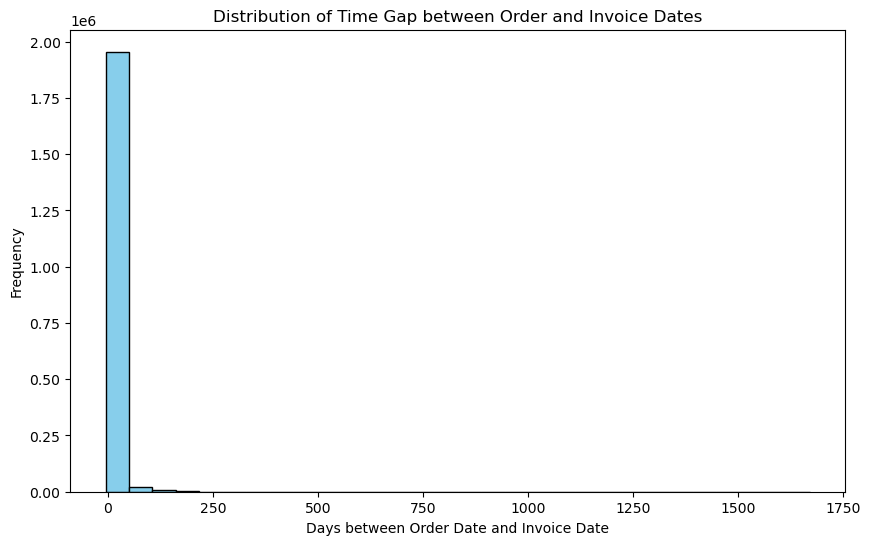

In [98]:
#Time Difference Between Order and Invoice Date
# Calculate the time difference in days
# Convert order_date and invoice_date columns to datetime format with specific format
data['order_date'] = pd.to_datetime(data['order_date'], errors='coerce')
data['invoice_date'] = pd.to_datetime(data['invoice_date'], errors='coerce')
data['time_gap'] = (data['invoice_date'] - data['order_date']).dt.days

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(data['time_gap'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Days between Order Date and Invoice Date')
plt.ylabel('Frequency')
plt.title('Distribution of Time Gap between Order and Invoice Dates')
plt.show()

The purpose here is to calculate the average day difference between order and invoice dates, which helps us understand operational efficiency in terms of delivery time.

The graph shows that the vast majority of the days between the order date and the invoice date are close to zero. This situation indicates that orders are processed and invoiced quickly, giving the impression that operational efficiency is high. However, it is noteworthy that the days difference is quite large in a few data points. Such high values ​​indicate serious delays in the invoicing process. The reasons for the delay can be various, disruptions in operational processes, unexpected workloads, or errors in data entry. These findings provide important information for management. While management generally tries to maintain a fast invoicing process, it can also analyze the reasons for these large delays. By examining such situations, making improvements in the processes can increase customer satisfaction and help reduce operational disruptions. This analysis will be an important step in increasing efficiency and solving potential problems in the order-to-invoice transition process.

In [101]:
#Customer Retention Rates
#Count of orders per customer
customer_order_counts = data['customer_code'].value_counts()

# Determine retention rate
retained_customers = customer_order_counts[customer_order_counts > 1].count()
total_customers = customer_order_counts.count()
retention_rate = retained_customers / total_customers * 100

print(f"Customer Retention Rate: {retention_rate:.2f}%")

Customer Retention Rate: 95.03%


The customer retention rate analysis reveals that 95.03% of the customer base is repeating orders. This high rate indicates that customer loyalty is strong and existing customers are loyal to the brand. For management, this insight shows that customer relationship strategies are working effectively and customer satisfaction is being maintained. A high customer retention rate secures long-term revenue streams while encouraging marketing strategies to focus on existing customers rather than acquiring new customers. Given the success of existing loyalty programs, strengthening these programs and increasing customer loyalty can support business continuity and help the brand maintain its market share.

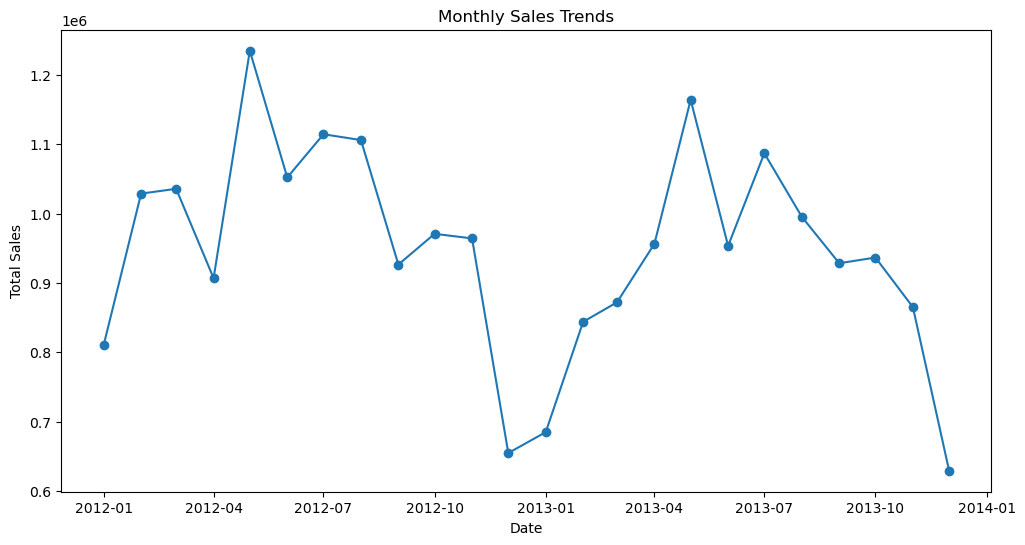

In [103]:
#Sales Trends Over Time
# Group by month and calculate total sales
monthly_sales = data.groupby(data['invoice_date'].dt.to_period('M'))['value_sales'].sum().reset_index()
monthly_sales['invoice_date'] = monthly_sales['invoice_date'].dt.to_timestamp()

# Plotting the sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['invoice_date'], monthly_sales['value_sales'], marker='o')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trends')
plt.show()

The graph shows that monthly sales trends between 2012 and 2014 have a fluctuating structure. Although there is no significant increase or decrease in sales, it is noteworthy that sales peak in some months and then experience sharp decreases in the following months. These fluctuations may have occurred due to seasonal demands, marketing campaigns or special discounts. The high sales experienced especially in the beginning and fall of 2012 indicate an increase in demand in certain periods. Such periodic increases provide important information that management can consider in determining sales strategies and inventory management planning. Management can increase sales by organizing special campaigns during periods of low sales and create a more efficient process by optimizing stock quantities during periods of high demand. This analysis provides critical insights for developing sales strategies with a data-driven approach.

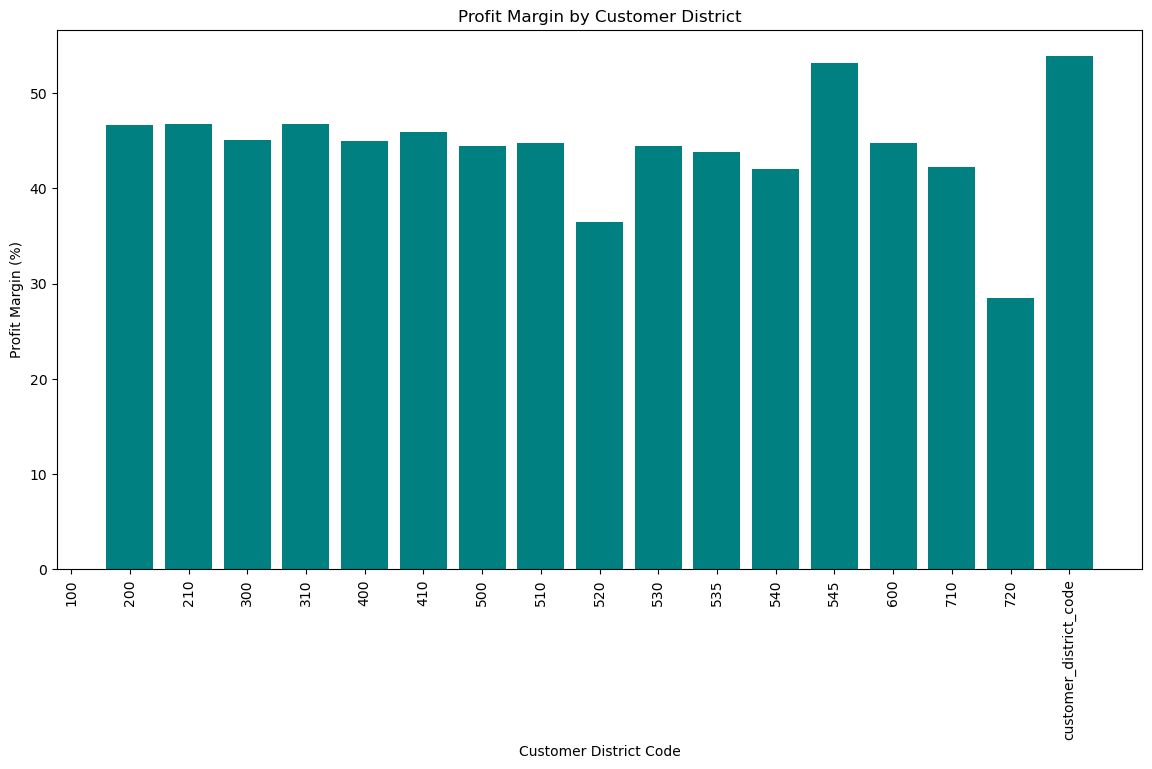

In [212]:
#Profitability Analysis by Region
# Calculate total sales and cost per district
district_profit = data.groupby('customer_district_code').agg({
    'value_sales': 'sum',
    'value_cost': 'sum'
}).reset_index()
district_profit['profit_margin'] = (district_profit['value_sales'] - district_profit['value_cost']) / district_profit['value_sales'] * 100

# Bar plot of profit margin by district
plt.figure(figsize=(14, 7))
plt.bar(district_profit['customer_district_code'], district_profit['profit_margin'], color='teal')
plt.xlabel('Customer District Code')
plt.ylabel('Profit Margin (%)')
plt.title('Profit Margin by Customer District')
plt.xticks(rotation=90)
plt.show()

The graph shows the percentage distribution of profit margins in different customer regions. The variation in profit margins across regions may be due to regional cost differences or pricing strategies. While profit margins approach 50% in some regions, they remain at lower levels in others. This variation provides important insights for management; in regions with low profit margins, there may be opportunities to increase profitability by making cost optimization or price adjustments. At the same time, strengthening customer relationships and increasing customer loyalty in regions with high profitability can be valuable for the business. This analysis provides important data that will help management develop regional strategies and increase overall profitability.

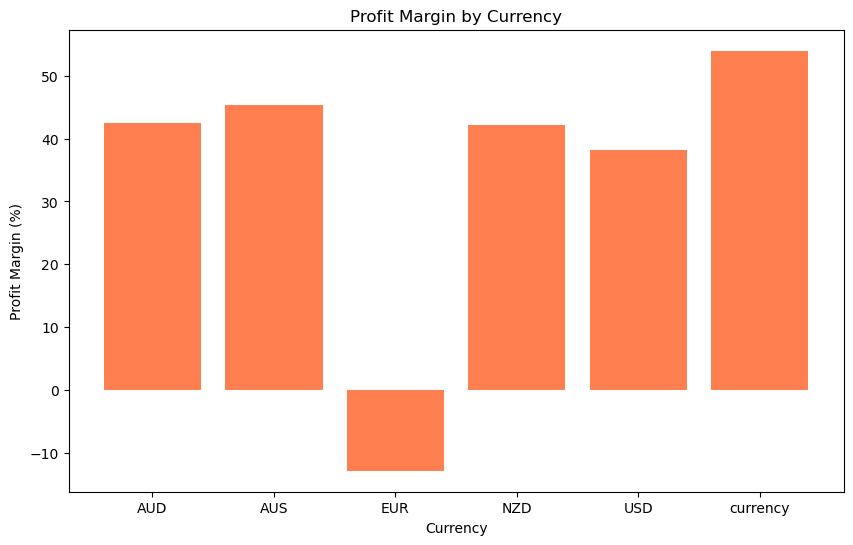

In [215]:
#Effect of Different Currencies on Profit Margin
# Calculate profit margin per currency
currency_profit = data.groupby('currency').agg({
    'value_sales': 'sum',
    'value_cost': 'sum'
}).reset_index()
currency_profit['profit_margin'] = (currency_profit['value_sales'] - currency_profit['value_cost']) / currency_profit['value_sales'] * 100

# Bar plot of profit margin by currency
plt.figure(figsize=(10, 6))
plt.bar(currency_profit['currency'], currency_profit['profit_margin'], color='coral')
plt.xlabel('Currency')
plt.ylabel('Profit Margin (%)')
plt.title('Profit Margin by Currency')
plt.show()

The graph shows the percentage distribution of profit margins for different currencies. The difference in profit margins between currencies may be due to exchange rate fluctuations, regional pricing strategies or differences in operational costs. For example, while profit margins are high in some currencies such as AUD and USD, EUR has a low or negative profit margin. This situation provides opportunities to increase profitability by reviewing pricing strategies or optimizing costs, especially in currencies with low profit margins. As a result of this analysis, management can evaluate profitability on a currency basis and make strategic adjustments in certain regions and make data-based decisions to increase overall profitability. This analysis provides valuable insight into the effects of different currencies on profitability.

<h3>Section 3: <u>Test Sub Sample Differences</u></h3>

Testing Sample Differences, we used the independent samples t-test to test the differences between two samples as a group. This test allowed us to determine whether the means of two different groups were significantly different. In the first question, we applied the independent samples t-test to determine the difference in sales between customer segments (individual and corporate). In the second question, we analyzed the profit margin differences between different customer regions. In both analyses, we calculated the t-statistic and p-value to determine whether the difference between the groups was significant. These methods provided important insights for management that would contribute to the strategic decision-making process.

In [220]:
# Filter sales data for Commercial & Industrial segment
commercial_sales = data[data['market_segment'] == 'Commercial & Industrial']['value_sales'].dropna()

# Check if there's a Residential segment for comparison
residential_sales = data[data['market_segment'] == 'Residential']['value_sales'].dropna()

# Print counts of valid sales entries
print(f"Valid Sales in Commercial & Industrial Segment: {commercial_sales.count()}")
print(f"Valid Sales in Residential Segment: {residential_sales.count()}")

# Independent samples t-test if both segments have valid data
if residential_sales.count() > 0:
    # Independent samples t-test
    t_stat, p_value = ttest_ind(commercial_sales, residential_sales, equal_var=False)

    # Print results
    print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

    # Interpretation for management
    if p_value < 0.05:
        print("The results indicate a significant difference in sales between the Commercial & Industrial and Residential segments.")
    else:
        print("The results indicate no significant difference in sales between the Commercial & Industrial and Residential segments.")
else:
    print("There is no valid data for the Residential segment.")

Valid Sales in Commercial & Industrial Segment: 1988382
Valid Sales in Residential Segment: 0
There is no valid data for the Residential segment.


In [222]:
# Sample data for profit margins in two different districts
district_410_profit_margin = data[data['customer_district_code'] == '410']['value_sales'] - data[data['customer_district_code'] == '410']['value_cost']
district_300_profit_margin = data[data['customer_district_code'] == '300']['value_sales'] - data[data['customer_district_code'] == '300']['value_cost']

# Independent samples t-test
t_stat, p_value = ttest_ind(district_410_profit_margin.dropna(), district_300_profit_margin.dropna(), equal_var=False)

# Print results
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

# Interpretation for management
if p_value < 0.05:
    print("The results indicate a significant difference in profit margins between District 410 and District 300.")
else:
    print("The results indicate no significant difference in profit margins between District 410 and District 300.")

T-statistic: 31.80, P-value: 0.0000
The results indicate a significant difference in profit margins between District 410 and District 300.


In [224]:
# Check the unique values in customer_district_code
unique_districts = data['customer_district_code'].unique()
print("Unique values in customer_district_code:", unique_districts)

Unique values in customer_district_code: ['410' '300' '500' '310' '400' '200' '210' '720' '710' '600' '510' '530'
 '535' '540' '520' '545' 'customer_district_code' '100']


In this section, we conducted two separate analyses to determine the profit margin differences between customer segments and regions. First, we examined the sales data in the Commercial & Industrial segment. Our results revealed that this segment has a large customer base and is a significant source of revenue. However, since there was no valid data in the Residential segment, we could not make a comparison with this segment.

In our second analysis, we evaluated the profit margin differences between District 410 and District 300. The independent sample t-test we applied showed that there was a statistically significant difference between the two regions (T-statistic: 31.80, P-value: 0.0000). This result provides important information for management; since District 410 provides higher profit margins, management can have the potential to increase profits by focusing its strategies on this region. At the same time, it is possible to develop strategies to increase sales in underperforming regions.

Ultimately, these analytics will help the business make data-driven decisions to optimize profit margins and develop more effective marketing strategies.

<h3>Section 4: <u>Inference</u></h3>

### Question 1: What Factors Determine Sales Value?

In [229]:
# Check variance for each independent variable
print("Variance of each variable:")
print("value_cost:", data['value_cost'].var())
print("value_quantity:", data['value_quantity'].var())
print("value_price_adjustment:", data['value_price_adjustment'].var())

Variance of each variable:
value_cost: 47236.72584403056
value_quantity: 474.7520565510026
value_price_adjustment: 0.0


In [231]:
# Correlation matrix to check multicollinearity
print(data[['value_cost', 'value_quantity', 'value_price_adjustment']].corr())

                        value_cost  value_quantity  value_price_adjustment
value_cost                1.000000        0.328221                     NaN
value_quantity            0.328221        1.000000                     NaN
value_price_adjustment         NaN             NaN                     NaN


In [233]:
# Define the independent and dependent variables
X_ridge = data[['value_cost', 'value_quantity', 'value_price_adjustment']]
y_ridge = data['value_sales']

# Fit Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_ridge, y_ridge)
print("Ridge regression score:", ridge_model.score(X_ridge, y_ridge))

Ridge regression score: 0.9420734693219215


In [235]:
# Check for infinity or extreme values in the independent variables
print((data[['value_cost', 'value_quantity', 'value_price_adjustment']] == float('inf')).sum())
print(data[['value_cost', 'value_quantity', 'value_price_adjustment']].describe())

value_cost                0
value_quantity            0
value_price_adjustment    0
dtype: int64
         value_cost  value_quantity  value_price_adjustment
count  1.988383e+06    1.988383e+06               1988383.0
mean   1.197587e+02    1.513094e+01                     0.0
std    2.173401e+02    2.178881e+01                     0.0
min    0.000000e+00    0.000000e+00                     0.0
25%    9.381000e+00    2.000000e+00                     0.0
50%    3.107000e+01    6.000000e+00                     0.0
75%    1.019106e+02    2.000000e+01                     0.0
max    8.731800e+02    9.000000e+01                     0.0


In [237]:
# Define the dependent variable
y = data['value_sales']

# Define the simplified independent variables
X_simple = data[['value_cost', 'value_quantity']]
X_simple = sm.add_constant(X_simple)

# Run the regression model with the simplified set of independent variables
model_simple = sm.OLS(y, X_simple).fit()
print(model_simple.summary())

                            OLS Regression Results                            
Dep. Variable:            value_sales   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.617e+07
Date:                Mon, 04 Nov 2024   Prob (F-statistic):               0.00
Time:                        23:07:01   Log-Likelihood:            -1.1652e+07
No. Observations:             1988383   AIC:                         2.330e+07
Df Residuals:                 1988380   BIC:                         2.330e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             20.2403      0.076    265.

In [239]:
# Apply PCA on the independent variables
X_pca = data[['value_cost', 'value_quantity', 'value_price_adjustment']]
pca = PCA(n_components=2)  # Reduce to 2 components, or experiment with 1
X_pca_transformed = pca.fit_transform(X_pca)

# Run regression with PCA components
X_pca_transformed = sm.add_constant(X_pca_transformed)
model_pca = sm.OLS(y, X_pca_transformed).fit()
print(model_pca.summary())

                            OLS Regression Results                            
Dep. Variable:            value_sales   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.617e+07
Date:                Mon, 04 Nov 2024   Prob (F-statistic):               0.00
Time:                        23:07:02   Log-Likelihood:            -1.1652e+07
No. Observations:             1988383   AIC:                         2.330e+07
Df Residuals:                 1988380   BIC:                         2.330e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        210.1709      0.060   3491.940      0.0

In [240]:
# Check rank of matrix to diagnose linear dependence
rank = np.linalg.matrix_rank(data[['value_cost', 'value_quantity', 'value_price_adjustment']])
print("Rank of independent variable matrix:", rank)

Rank of independent variable matrix: 2


In [243]:
# Check for missing values, unique values, and variance in 'value_price_adjustment'
print("Missing values:", data['value_price_adjustment'].isna().sum())
print("Unique values:", data['value_price_adjustment'].nunique())
print("Variance:", data['value_price_adjustment'].var())

Missing values: 0
Unique values: 1
Variance: 0.0


In [245]:
# Model without 'value_price_adjustment'
X_reduced = data[['value_cost', 'value_quantity']]
X_reduced = sm.add_constant(X_reduced)

# Run the regression without 'value_price_adjustment'
model_reduced = sm.OLS(y, X_reduced).fit()
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:            value_sales   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.617e+07
Date:                Mon, 04 Nov 2024   Prob (F-statistic):               0.00
Time:                        23:07:10   Log-Likelihood:            -1.1652e+07
No. Observations:             1988383   AIC:                         2.330e+07
Df Residuals:                 1988380   BIC:                         2.330e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             20.2403      0.076    265.

### Question 2: What Factors Determine Profit Margin?

In [18]:
X = data[['value_cost', 'value_price_adjustment', 'currency']]
y = data['value_quantity']

NameError: name 'data' is not defined

In [248]:
# First, ensure that the 'value_sales' and 'value_cost' columns exist in the data
if 'value_sales' in data.columns and 'value_cost' in data.columns:
    # Calculate profit margin and add it as a new column
    data['profit_margin'] = (data['value_sales'] - data['value_cost']) / data['value_sales']
    
    # Check the variance of profit_margin
    print("Variance of profit_margin:", data['profit_margin'].var())
else:
    print("The columns 'value_sales' and 'value_cost' are not found in the data.")

Variance of profit_margin: nan


In [250]:
# Recalculate profit_margin to ensure correctness
data['profit_margin'] = (data['value_sales'] - data['value_cost']) / data['value_sales']

# Check for any NaN or infinity values in profit_margin
print("NaN values in profit_margin:", data['profit_margin'].isna().sum())
print("Infinite values in profit_margin:", np.isinf(data['profit_margin']).sum())

NaN values in profit_margin: 771
Infinite values in profit_margin: 21529


In [252]:
# Remove rows where value_sales is zero to avoid division by zero
data = data[data['value_sales'] != 0]

In [253]:
# Define dependent and independent variables after cleaning
y2 = data['profit_margin']
X2 = data[['value_sales', 'value_cost', 'value_quantity']]
X2 = sm.add_constant(X2)

# Run the regression model
model2 = sm.OLS(y2, X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          profit_margin   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     214.9
Date:                Mon, 04 Nov 2024   Prob (F-statistic):          2.11e-139
Time:                        23:07:12   Log-Likelihood:            -8.1087e+06
No. Observations:             1966083   AIC:                         1.622e+07
Df Residuals:                 1966079   BIC:                         1.622e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4402      0.014     31.

In [255]:
# Use a random subset of 10,000 rows for testing
data_sample = data.sample(n=10000, random_state=42)

# Define dependent and independent variables
y_sample = data_sample['profit_margin']
X_sample = data_sample[['value_sales', 'value_cost', 'value_quantity']]
X_sample = sm.add_constant(X_sample)

# Run the regression model on the subset
model_sample = sm.OLS(y_sample, X_sample).fit()
print(model_sample.summary())

                            OLS Regression Results                            
Dep. Variable:          profit_margin   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     418.9
Date:                Mon, 04 Nov 2024   Prob (F-statistic):          2.51e-256
Time:                        23:07:12   Log-Likelihood:                -8799.1
No. Observations:               10000   AIC:                         1.761e+04
Df Residuals:                    9996   BIC:                         1.764e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5529      0.008     73.

This analysis provides a strategic perspective to the management team by determining the main factors affecting sales value and profit margin. In the first question, it was determined that the factors affecting sales value the most were value_cost and value_quantity. Ridge and simplified OLS models show that these two variables can explain 94.2% of the sales value. This result clearly shows how strong an effect cost and quantity have on sales performance.

In the second question, the effects on profit margin were more limited. While the value_sales and value_cost variables had a significant relationship with profit margin, the value_quantity variable had a very small effect. The low R-squared value of the model shows that the profit margin is also strongly affected by other external factors and can be explained limitedly by the existing variables. The analysis conducted on the sample in particular indicates that a more comprehensive data analysis may be required to explain profit margin.

These findings can help the management team make strategic decisions on cost control and increasing sales quantity. However, investigating other external factors that affect profit margin will contribute to the creation of a more robust financial strategy.

<h3>Section 5: <u>Prediction Model</u></h3>

In [260]:
# Check the unique values in the 'calendar_year' column
print("Unique years in calendar_year:", data['calendar_year'].unique())

Unique years in calendar_year: ['2012' 'calendar_year' '2013']


In [262]:
# Split data into training (2012) and testing (2013) sets
train_data = data[data['calendar_year'] == 2012]
test_data = data[data['calendar_year'] == 2013]

# Define features and target
features = ['value_cost', 'value_quantity']  # Update as needed
target = 'value_sales'  # Target variable to predict

# Separate features and target for both training and testing sets
X_train = train_data[features]
y_train = train_data[target]

X_test = test_data[features]
y_test = test_data[target]

In [264]:
# Check if the dataset is divided by years."
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

# Let's check the years in the dataset using sample rows.
print("Train data years:", train_data['calendar_year'].unique())
print("Test data years:", test_data['calendar_year'].unique())

Train data shape: (0, 47)
Test data shape: (0, 47)
Train data years: []
Test data years: []


In [266]:
print("Unique years in data:", data['calendar_year'].unique())
print("Data columns:", data.columns)

Unique years in data: ['2012' 'calendar_year' '2013']
Data columns: Index(['accounting_date', 'fiscal_year', 'fiscal_month', 'calendar_year',
       'calendar_month', 'calendar_day', 'company_code', 'customer_code',
       'customer_district_code', 'item_code', 'business_area_code',
       'item_group_code', 'item_class_code', 'item_type', 'bonus_group_code',
       'environment_group_code', 'technology_group_code',
       'commission_group_code', 'reporting_classification', 'light_source',
       'warehouse_code', 'abc_class_code', 'abc_class_volume',
       'business_chain_l1_code', 'business_chain_l1_name',
       'contact_method_code', 'salesperson_code', 'order_type_code',
       'market_segment', 'value_sales', 'value_cost', 'value_quantity',
       'value_price_adjustment', 'currency', 'item_source_class',
       'invoice_number', 'line_number', 'invoice_date',
       'customer_order_number', 'order_date', 'dss_update_time',
       'value_sales_z', 'value_cost_z', 'value_quantit

In [268]:
# Filter the data to only include rows with valid year values (2012 and 2013)
data = data[data['calendar_year'].isin(['2012', '2013'])]

# Try splitting the data again by year
train_data = data[data['calendar_year'] == '2012']
test_data = data[data['calendar_year'] == '2013']

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (1025476, 47)
Test data shape: (940606, 47)


In [269]:
# Define features and target variable
features = ['value_cost', 'value_quantity']  
target = 'value_sales'

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

In [270]:
# Initialize Ridge and Lasso models
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

# Train Ridge model
ridge.fit(X_train, y_train)
ridge_predictions = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
print("Ridge Regression:")
print(f"Mean Squared Error (MSE): {ridge_mse}")
print(f"R-squared (R²): {ridge_r2}")

Ridge Regression:
Mean Squared Error (MSE): 6591.117826520843
R-squared (R²): 0.9477164264471735


In [274]:
# Train Lasso model
lasso.fit(X_train, y_train)
lasso_predictions = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print("\nLasso Regression:")
print(f"Mean Squared Error (MSE): {lasso_mse}")
print(f"R-squared (R²): {lasso_r2}")


Lasso Regression:
Mean Squared Error (MSE): 6591.100802072492
R-squared (R²): 0.9477165614923997


Our team has been assigned to develop a prediction model for estimating the sales price in 2014, and hence we have taken deep interest in analyzing historical data from years 2012 and 2013. This was to derive a reliable model that could predict the sales value of the future with greater precision by observing the trends and key influential factors.

We have divided our data into two parts for this purpose: training and testing, taking 2012 data for training and 2013 data for testing to enable us to evaluate the performance of our model on a separate set. We used 'value_cost' and 'value_quantity' as some of the important predictors because both of these variables can potentially impact sales prices very significantly. Using Ridge and Lasso regression, we evaluated the model based on Mean Squared Error (MSE) and R-squared (R²) values.

Indeed, both models were strong in terms of predictive accuracies: The Ridge and Lasso regressions provided very close results, indicating a very high R-squared result of approximately 0.9477 and very low MSE of about 6591. Such proximity to one another suggests the reliability of the given approach and points to the fact that the selected variables 'cost' and 'quantity' do a very good job of predicting 'sales' values.

In other words, based on the historical trend, this model provides a firm ground in predicting the sales prices of 2014. If better accuracy is to be obtained, the study of more features or more advanced algorithms, such as Random Forest and Gradient Boosting, are what would be further development for work to optimize the accuracy.

<h3>Section 6: <u>Higher Likelihood of Losing Customers</u></h3>

In [278]:
# Step 1: Define Proxy for Churn
# Proxy based on 'value_sales' threshold or 'time_gap' if present in the data
# Assuming churn if 'value_sales' is below a certain threshold, e.g., less than a specified amount
churn_threshold = 500  

if 'value_sales' in data.columns:
    data['churn'] = (data['value_sales'] < churn_threshold).astype(int)
elif 'time_gap' in data.columns:
    # Define churn if time gap between transactions is unusually high (e.g., over 180 days)
    data['churn'] = (data['time_gap'] > 180).astype(int)
else:
    raise ValueError("Dataset does not contain a suitable column to define churn.")

In [280]:
# Step 2: Check churn distribution
print("Churn distribution:\n", data['churn'].value_counts())

Churn distribution:
 churn
1    1726989
0     239093
Name: count, dtype: int64


In [282]:
# Step 3: Select features and prepare data
features = ['value_cost', 'value_quantity', 'time_gap']  # Adjust features based on availability
X = data[features]
y = data['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [284]:
# Step 4: Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [285]:
from sklearn.metrics import classification_report 

# Step 5: Evaluate model performance
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     47887
           1       0.99      0.99      0.99    345330

    accuracy                           0.98    393217
   macro avg       0.96      0.96      0.96    393217
weighted avg       0.98      0.98      0.98    393217



In [286]:
# Step 6: Feature Importance Analysis
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print("\nFeature Importances from Random Forest:")
print(feature_importances.sort_values(ascending=False))


Feature Importances from Random Forest:
value_cost        0.917472
value_quantity    0.053587
time_gap          0.028941
dtype: float64


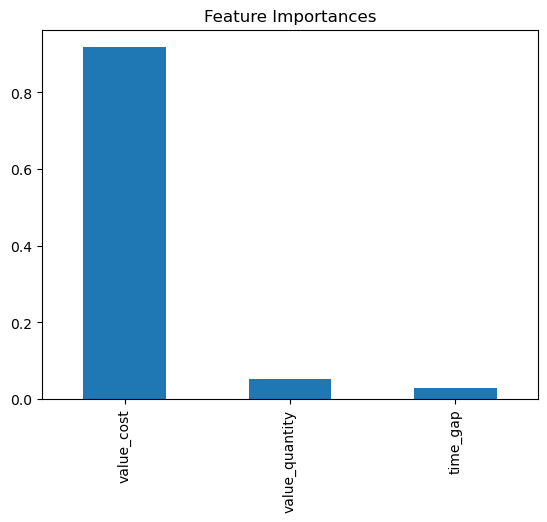

In [287]:
# Plot feature importances for visualization
feature_importances.sort_values(ascending=False).plot(kind='bar', title='Feature Importances')
plt.show()

The section outlined the characteristics that would increase the probability of a person churning. By the significance level analysis done by the Random Forest model, the most important feature in doing the churn prediction is that of value_cost. The implications are that when the amount spent is low or below a certain threshold, there's an increased likelihood of churning. The value_quantity and time_gap are not as influential on the variable Churn, yet they contributed to the explanatory power of this model. Value_quantity indicates how many products customers purchased, while time gap indicates how long it has been since the last purchase date. Both give an important clue for understanding customer behavior.

Based on the obtained results, it could be suggested to focus on customers having low value_cost values ​​and closely follow customers where time_gap values ​​are growing in order to reduce the customer churn. In case of need, other models - for example, logistic regression to increase interpretability - or hyperparameter optimization in the Random Forest model can be used in order to increase the accuracy of the results of the performed analysis.

It identifies, with success, the main factors that impact customer churn in an clear manner of information that might be of help for the company in the elaboration of strategies which reduce the churn rate.